In [1]:
import time
print(time.ctime())
%load_ext ipydex.displaytools

Thu Dec 16 11:43:42 2021


In [2]:
import sympy as sp

s, t = sp.symbols("s, t")

# Constructing the Desired Velocity Profile (for $x$)

- starting and stopping with $\dot s = 0$
- maximum not in the middle (optional)

(sdot) := sin(pi*t)

---

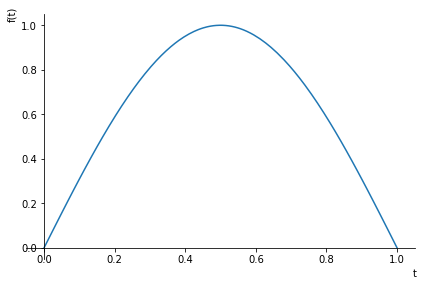

In [3]:
z = sp.pi*t

# Amplitude of cos
q = sp.Rational(0.5)

# sdot = 1 # constant velocity
sdot = sp.sin(z) # starting and stopping with 0
# sdot = sp.sin(z)*(1+q*sp.cos(2*z)) # starting and stopping with 0 and reducing maximum in the middle
sdot ##:

sp.plot(sdot, (t, 0, 1))

In [4]:
s = sp.integrate(sdot, t) ##:

# adjust integration constant (s should start at 0):
s -= s.subs(t, 0)

# adjust scale (s should end at 1):
s = s/s.subs(t, 1) ##:

s := -cos(pi*t)/pi

---

s := pi*(-cos(pi*t)/pi + 1/pi)/2

---

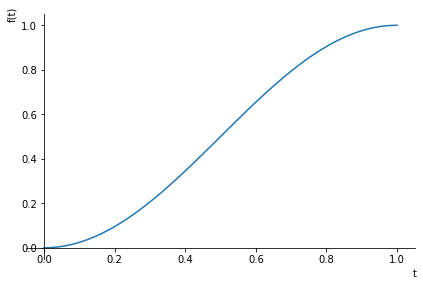

In [5]:
sp.plot(s, (t, 0, 1))

# Constructing the Path

In [6]:
x0 = 2
x1 = 3

y0 = 0
y1 = -1

In [7]:
aa = a0, a1, a2, a3 = sp.symbols("a0, a1, a2, a3")
xs = sp.symbols("x")
poly =  a3 * xs**3 + a2*xs**2 + a1*xs + a0


# formulate the conditions as "=0"-equations (all terms on one side)
conditions = [
    poly.subs(xs, x0) - y0,
    poly.diff(xs).subs(xs, x0) - 0,
    poly.subs(xs, x1) - y1,
    poly.diff(xs).subs(xs, x1) - 0
]

sol = sp.solve(conditions, aa) ##:




sol := {a0: -28, a1: 36, a2: -15, a3: 2}

---

In [8]:
x_expr = x0*(1-s) + x1*s
y_expr = (a3 * x_expr**3 + a2*x_expr**2 + a1*x_expr + a0).subs(sol)

path = sp.Matrix([x_expr, y_expr]) ##:

path := Matrix([
[                                                                                     pi*(-cos(pi*t)/pi + 1/pi)/2 + 2],
[18*pi*(-cos(pi*t)/pi + 1/pi) + 2*(pi*(-cos(pi*t)/pi + 1/pi)/2 + 2)**3 - 15*(pi*(-cos(pi*t)/pi + 1/pi)/2 + 2)**2 + 44]])

---

In [9]:
v_expr = sp.sqrt(x_expr.diff(t)**2 + y_expr.diff(t)**2) ##:

v_expr := sqrt((3*pi*(pi*(-cos(pi*t)/pi + 1/pi)/2 + 2)**2*sin(pi*t) - 15*pi*(pi*(-cos(pi*t)/pi + 1/pi)/2 + 2)*sin(pi*t) + 18*pi*sin(pi*t))**2 + pi**2*sin(pi*t)**2/4)

---

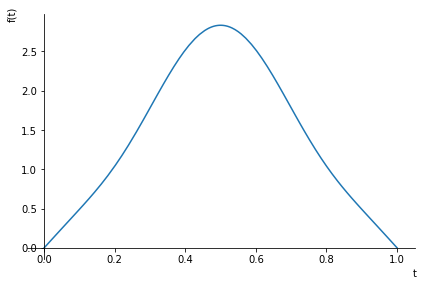

In [10]:
sp.plot(v_expr, (t, 0, 1))

In [11]:
v_expr.evalf()

58.9048622548086*(((1 - 0.2*cos(pi*t))**2*sin(pi*t) - 0.8*(2.5 - 0.5*cos(pi*t))*sin(pi*t) + 0.96*sin(pi*t))**2 + 0.000711111111111111*sin(pi*t)**2)**0.5